In [8]:
import pyodbc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
import os 
sns.set_style('darkgrid')

In [9]:
#Conexion y seleccion a base de datos.
conn = pyodbc.connect('Driver={SQL Server};'
'Server=LAPTOP-0I4EFM0E;'
'Database=RepuestosWeb;'
'Trusted_Connection=yes;', timeout=3000)

In [27]:
CityDataFrame = pd.read_sql(
    "SELECT ci.Nombre AS NombreCiudad, "
    + "c.Genero, "
    + "p.ID_Parte, "
    + "p.ID_Categoria, "
    + "o.Total_Orden, "
    + "TotalEncimaPromedio = CASE WHEN (o.Total_Orden/ "
    + "(SELECT AVG(o2.Total_Orden) "
    + "FROM dbo.Orden o2)) > 1 "
    + "THEN 1 ELSE 0 end "
    + "FROM dbo.Clientes c "
    + "INNER JOIN dbo.Orden o "
    + "ON o.ID_Cliente = c.ID_Cliente "
    + "INNER JOIN dbo.Detalle_orden do "
    + "ON do.ID_Orden = o.ID_Orden "
    + "INNER JOIN dbo.Partes p "
    + "ON p.ID_Parte = do.ID_Parte "
    + "INNER JOIN dbo.Ciudad ci "
    + "ON ci.ID_Ciudad = o.ID_Ciudad "
    + "INNER JOIN dbo.Categoria cat "
    + "ON cat.ID_Categoria = p.ID_Categoria ", conn )
CityDataFrame.head(15)

,NombreCiudad,Genero,ID_Parte,ID_Categoria,Total_Orden,TotalEncimaPromedio
0,San Diego,M,AC1100173CORE-ORIG.REC,1612,23139.50,1
1,Tacoma,F,AC1320108-ORIG.REC,2827,1041.55,0
2,Akron,M,AC1228119-ORIG.REC,3154,6207.45,0
3,Richmond,M,AC1217107,3225,13022.11,1
4,Dallas,F,AC2519105-ORIG.REC,4241,2145.25,0
5,Shreveport,F,AC1100177-ORIG.REC,2512,14485.40,1
6,Fresno,M,AC1114104C,2560,1950.12,0
7,Boston,F,AC1249128,3847,5526.56,0
8,Louisville,F,AC1228103,2598,6327.91,0
9,St. Louis,M,AC1115103C-ORIG.REC,2746,8611.97,0


In [28]:
#Almacenar las variables X y Y
X = CityDataFrame.iloc[:,0:2].values
Y = CityDataFrame.iloc[:, -1].values
X

array([['San Diego', 'M'],
       ['Tacoma', 'F'],
       ['Akron', 'M'],
       ...,
       ['Tacoma', 'M'],
       ['Bakersfield', 'F'],
       ['Greensboro', 'F']], dtype=object)

In [29]:
#Codificar atributos no numericos segun el numero de escala
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])
X[:,1] = le.fit_transform(X[:,1])
X

array([[76, 1],
       [87, 0],
       [0, 1],
       ...,
       [87, 1],
       [8, 0],
       [34, 0]], dtype=object)

In [30]:
#Split de 80 - 20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [31]:
#Split Arbol 80 - 20
from sklearn.model_selection import train_test_split
X_tree_train, X_tree_test, y_tree_train, y_tree_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [32]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [33]:
#Crear modelo de arbol
from sklearn.tree import DecisionTreeClassifier
classifier_tree = DecisionTreeClassifier()
classifier_tree.fit(X_tree_train, y_tree_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [34]:
#Variable dependiente usando variables independientes del 20%
y_pred = classifier.predict(X_test)
y_pred 

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

In [35]:
#Variable Arbol
y_tree_pred = classifier_tree.predict(X_tree_test)
y_tree_pred

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [36]:
#Valores reales de Y con el 20%
y_test

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [37]:
#Matriz de confusion y precision
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)

In [38]:
#Matriz y precision de Arbol
from sklearn.metrics import confusion_matrix, accuracy_score
cm_tree = confusion_matrix(y_tree_test, y_tree_pred)
ac_tree = accuracy_score(y_tree_test, y_tree_pred)

In [39]:
#Confusion Matrix
cm

array([[208, 993],
       [223, 958]], dtype=int64)

In [40]:
#Confusion Matrix Arbol
cm_tree

array([[591, 610],
       [568, 613]], dtype=int64)

In [41]:
#Presicion del modelo
ac

0.489504617968094

In [42]:
#Presicion del modelo Arbol
ac_tree

0.5054575986565911

[Text(0, 0.5, 'True'), Text(0, 1.5, 'False')]

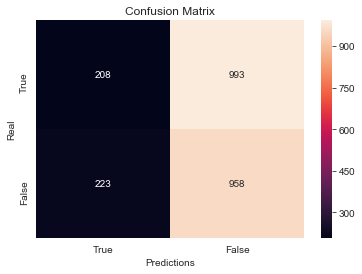

In [43]:
#Graficar matriz de confusion
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, fmt='d')
ax.set_xlabel('Predictions');ax.set_ylabel('Real')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['True', 'False']); ax.yaxis.set_ticklabels(['True', 'False'])